# **clustering**

**Apa itu K-Means Clustering**  
Cluster adalah pengelompokkan data berdasarkan kesamaan karakteristik, dengan tujuan agar dalam kelompok sifatnya mirip2 tapi dengan kelompok lain beda.
Teknik pengelompokan (Clustering) berbasis partisi. Membagi data menjadi K kelompok berdasarkan jarak. Setiap kelompok direpresentasikan oleh centroid (rata-rata dari titik dalam kluster).  

**Mengapa Perlu Clustering?**  
Data sering kali tidak memiliki label → Unsupervised Learning
Clustering membantu mengelompokkan data berdasarkan kesamaan karakteristik.  

**langkah-langkah menentukan algoritma k-means**
1. tentukan jumlah kluster K
2. pilih k centroid awal secara acak
3. hitung jarak setiap data ke tiap centroid
4. kelompokkan data berdasarkan centroid terdekat
5. Hitung ulang centroid dari rata-rata anggota cluster
6. hitung ulang centroid 3-5 hingga konvergen (tidak ada perubahan signifikan)

**Tujuan dan Fungsi**  
* Meminimalkan variasi dalam cluster (within-cluster variance)
* Mengelompokkan objek sehingga :
    * Objek dalam kluster sehomogen mungkin
    * Objek antar kluster seheterogen mungkin


**Evaluasi Hasil**
* Inertia : Jumlah kuadrat jarak antara titik dan centroid
    * Nilai Inertia :
        * Sangat kecil (Mendekati 0) : Klaster sangat kompak dan semua titik dekat dengan centroidnya -> Sangat baik.
        * Kecil hingga sedang : Klaster cukup baik dan dapat diterima dalam banyak kasus.
        * Besar : Klaster tidak rapat, mungkin distribusi datanya tidak cocok dengan K-Means atau k terlalu kecil.
* Silhouette Score : Ukuran seberapa mirip suatu objek dengan klusternya dibanding kluster lain  
* Elbow Method : Untuk memilih nilai K optimal


In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
# Membaca file CSV
df = pd.read_csv("hasil_gabungan.csv")
print(df.head())  # Menampilkan 5 baris pertama dari DataFrame

silhouette_scores = []
sse_scores = []

   id        class  petal_length  petal_width  sepal_length  sepal_width
0   1  Iris-setosa           1.4          0.2           5.1          3.5
1   2  Iris-setosa           1.4          0.2           4.9          3.0
2   3  Iris-setosa           1.3          0.2           4.7          3.2
3   4  Iris-setosa           1.5          0.2           4.6          3.1
4   5  Iris-setosa           1.4          0.2           5.0          3.6


#### Menghapus kolom class dan id

In [39]:
X = df.drop(columns=["class", "id"]).values
print(X)

[[1.4 0.2 5.1 3.5]
 [1.4 0.2 4.9 3. ]
 [1.3 0.2 4.7 3.2]
 [1.5 0.2 4.6 3.1]
 [1.4 0.2 5.  3.6]
 [1.7 0.4 5.4 3.9]
 [1.4 0.3 4.6 3.4]
 [1.5 0.2 5.  3.4]
 [1.4 0.2 4.4 2.9]
 [1.5 0.1 4.9 3.1]
 [1.5 0.2 5.4 3.7]
 [1.6 0.2 4.8 3.4]
 [1.4 0.1 4.8 3. ]
 [1.1 0.1 4.3 3. ]
 [1.2 0.2 5.8 4. ]
 [1.5 0.4 5.7 4.4]
 [1.3 0.4 5.4 3.9]
 [1.4 0.3 5.1 3.5]
 [1.7 0.3 5.7 3.8]
 [1.5 0.3 5.1 3.8]
 [1.7 0.2 5.4 3.4]
 [1.5 0.4 5.1 3.7]
 [1.  0.2 4.6 3.6]
 [1.7 0.5 5.1 3.3]
 [1.9 0.2 4.8 3.4]
 [1.6 0.2 5.  3. ]
 [1.6 0.4 5.  3.4]
 [1.5 0.2 5.2 3.5]
 [1.4 0.2 5.2 3.4]
 [1.6 0.2 4.7 3.2]
 [1.6 0.2 4.8 3.1]
 [1.5 0.4 5.4 3.4]
 [1.5 0.1 5.2 4.1]
 [1.4 0.2 5.5 4.2]
 [1.5 0.1 4.9 3.1]
 [1.2 0.2 5.  3.2]
 [1.3 0.2 5.5 3.5]
 [1.5 0.1 4.9 3.1]
 [1.3 0.2 4.4 3. ]
 [1.5 0.2 5.1 3.4]
 [1.3 0.3 5.  3.5]
 [1.3 0.3 4.5 2.3]
 [1.3 0.2 4.4 3.2]
 [1.6 0.6 5.  3.5]
 [1.9 0.4 5.1 3.8]
 [1.4 0.3 4.8 3. ]
 [1.6 0.2 5.1 3.8]
 [1.4 0.2 4.6 3.2]
 [1.5 0.2 5.3 3.7]
 [1.4 0.2 5.  3.3]
 [4.7 1.4 7.  3.2]
 [4.5 1.5 6.4 3.2]
 [4.9 1.5 6.

### **Klastering K-Means dengan 2 Klaster**
#### Pengelompokan 2 cluster (termasuk cluster 0 & 1)

In [40]:
kmeans2 = KMeans(n_clusters=2, random_state=0, n_init="auto", max_iter=250, tol=0.0002, verbose=0,copy_x=True,algorithm="lloyd").fit(X)
print("Centroid cluster:", kmeans2.cluster_centers_) #Menampilkan 2 centroid
print("Hasil label cluster:", kmeans2.labels_)

Centroid cluster: [[1.56226415 0.28867925 5.00566038 3.36037736]
 [4.95876289 1.69587629 6.30103093 2.88659794]]
Hasil label cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


#### Menghitung Silhouette

In [41]:
score2 = silhouette_score(X, kmeans2.labels_)
print("Silhouette Score:", score2)
silhouette_scores.append(score2)

Silhouette Score: 0.6808136202936812


#### Menghitung SSE (Sum of Squared Errors)

In [42]:
sse2 = kmeans2.inertia_
print("SSE (Inertia):", sse2)
sse_scores.append(sse2)

SSE (Inertia): 152.36870647733906


### **Klastering K-Means dengan 3 Klaster**

In [43]:
kmeans3 = KMeans(n_clusters=3, random_state=0, n_init="auto", max_iter=250, tol=0.0002, verbose=0,copy_x=True,algorithm="lloyd").fit(X)
print("Centroid cluster:", kmeans3.cluster_centers_)
print("Hasil label cluster:", kmeans3.labels_)

Centroid cluster: [[4.38852459 1.43442623 5.88360656 2.74098361]
 [1.464      0.244      5.006      3.418     ]
 [5.71538462 2.05384615 6.85384615 3.07692308]]
Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### Menghitung Silhouette

In [44]:
score3 = silhouette_score(X, kmeans3.labels_)
print("Silhouette Score:", score3)
silhouette_scores.append(score3)

Silhouette Score: 0.5509643746707433


#### Menghitung SSE

In [45]:
sse3 = kmeans3.inertia_
print("SSE (Inertia):", sse3)
sse_scores.append(sse3)

SSE (Inertia): 78.94506582597731


### **Klastering K-Means dengan 4 Klaster**

In [46]:
kmeans4 = KMeans(n_clusters=4, random_state=0, n_init="auto", max_iter=250, tol=0.0002, verbose=0,copy_x=True,algorithm="lloyd").fit(X)
print("Hasil label cluster:", kmeans4.labels_)

Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]


#### Menghitung Silhouette

In [47]:
score4 = silhouette_score(X, kmeans4.labels_)
print("Silhouette Score:", score4)
silhouette_scores.append(score4)

Silhouette Score: 0.497825690109546


#### Menghitung SSE

In [48]:
sse4 = kmeans4.inertia_
print("SSE (Inertia):", sse4)
sse_scores.append(sse4)

SSE (Inertia): 57.317873214285704


#### **Elbow Method (Untuk memilih nilai K optimal)**

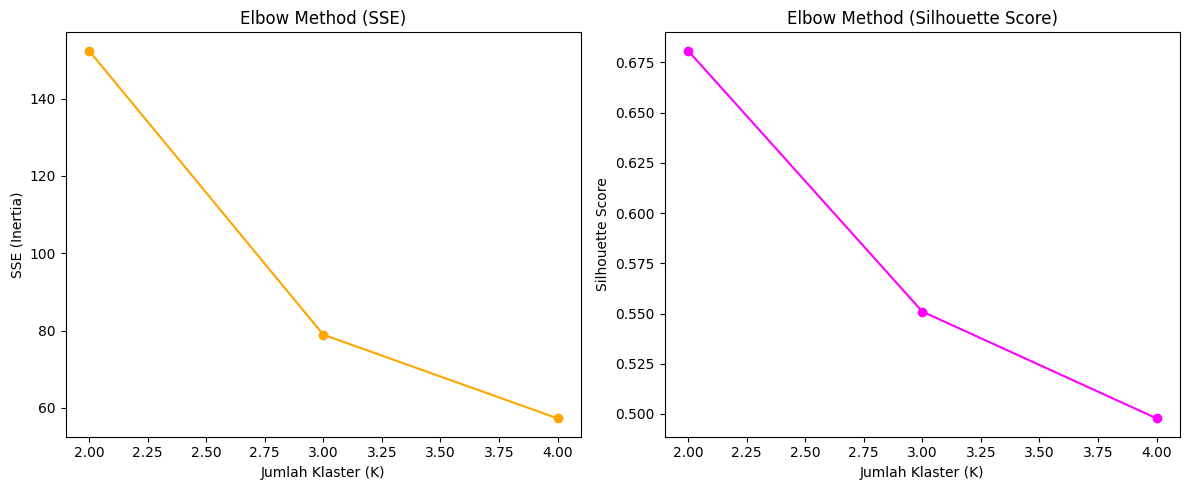

In [52]:
import matplotlib.pyplot as plt

# 4. Visualisasi SSE dan Silhouette Score
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 5), sse_scores, marker='o', color='orange')
plt.title('Elbow Method (SSE)')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('SSE (Inertia)')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 5), silhouette_scores, marker='o', color='magenta')
plt.title('Elbow Method (Silhouette Score)')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## **Clustering**

**-> dengan label class**

In [149]:
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [150]:
# Membaca file CSV
df = pd.read_csv("hasil_gabungan.csv")

silhouette_scores2 = []
sse_scores2 = []
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
X = df.drop(columns=["id"]).values
print(X)  # Menampilkan 5 baris pertama dari DataFrame

[[0.  1.4 0.2 5.1 3.5]
 [0.  1.4 0.2 4.9 3. ]
 [0.  1.3 0.2 4.7 3.2]
 [0.  1.5 0.2 4.6 3.1]
 [0.  1.4 0.2 5.  3.6]
 [0.  1.7 0.4 5.4 3.9]
 [0.  1.4 0.3 4.6 3.4]
 [0.  1.5 0.2 5.  3.4]
 [0.  1.4 0.2 4.4 2.9]
 [0.  1.5 0.1 4.9 3.1]
 [0.  1.5 0.2 5.4 3.7]
 [0.  1.6 0.2 4.8 3.4]
 [0.  1.4 0.1 4.8 3. ]
 [0.  1.1 0.1 4.3 3. ]
 [0.  1.2 0.2 5.8 4. ]
 [0.  1.5 0.4 5.7 4.4]
 [0.  1.3 0.4 5.4 3.9]
 [0.  1.4 0.3 5.1 3.5]
 [0.  1.7 0.3 5.7 3.8]
 [0.  1.5 0.3 5.1 3.8]
 [0.  1.7 0.2 5.4 3.4]
 [0.  1.5 0.4 5.1 3.7]
 [0.  1.  0.2 4.6 3.6]
 [0.  1.7 0.5 5.1 3.3]
 [0.  1.9 0.2 4.8 3.4]
 [0.  1.6 0.2 5.  3. ]
 [0.  1.6 0.4 5.  3.4]
 [0.  1.5 0.2 5.2 3.5]
 [0.  1.4 0.2 5.2 3.4]
 [0.  1.6 0.2 4.7 3.2]
 [0.  1.6 0.2 4.8 3.1]
 [0.  1.5 0.4 5.4 3.4]
 [0.  1.5 0.1 5.2 4.1]
 [0.  1.4 0.2 5.5 4.2]
 [0.  1.5 0.1 4.9 3.1]
 [0.  1.2 0.2 5.  3.2]
 [0.  1.3 0.2 5.5 3.5]
 [0.  1.5 0.1 4.9 3.1]
 [0.  1.3 0.2 4.4 3. ]
 [0.  1.5 0.2 5.1 3.4]
 [0.  1.3 0.3 5.  3.5]
 [0.  1.3 0.3 4.5 2.3]
 [0.  1.3 0.2 4.4 3.2]
 [0.  1.6 0

### **Klastering K-Means dengan 2 Klaster**

#### Pengelompokan 2 cluster (termasuk cluster 0 & 1)

In [151]:
kmeans2 = KMeans(n_clusters=2, random_state=0, n_init="auto", max_iter=250, tol=0.0002, verbose=0,copy_x=True,algorithm="lloyd").fit(X)
print("Centroid cluster:", kmeans2.cluster_centers_) #Menampilkan 2 centroid
print("Hasil label cluster:", kmeans2.labels_)

Centroid cluster: [[0.03846154 1.52884615 0.275      5.00576923 3.38076923]
 [1.51020408 4.94183673 1.68877551 6.2877551  2.88061224]]
Hasil label cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


#### Menghitung Silhouette

In [152]:
score2 = silhouette_score(X, kmeans2.labels_)
print("Silhouette Score:", score2)
silhouette_scores2.append(score2)

Silhouette Score: 0.6761002460735732


#### Menghitung SSE

In [153]:
sse2 = kmeans2.inertia_
print("SSE (Inertia):", sse2)
sse_scores2.append(sse2)

SSE (Inertia): 179.26073390894823


### **Klastering K-Means dengan 3 Klaster**

In [154]:
kmeans3 = KMeans(n_clusters=3, random_state=0, n_init="auto", max_iter=250, tol=0.0002, verbose=0,copy_x=True,algorithm="lloyd").fit(X)
print("Centroid cluster:", kmeans3.cluster_centers_)
print("Hasil label cluster:", kmeans3.labels_)

Centroid cluster: [[1.02  4.25  1.326 5.9   2.76 ]
 [0.    1.464 0.244 5.006 3.418]
 [1.98  5.562 2.026 6.624 2.984]]
Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Menghitung Silhouette

In [155]:
score3 = silhouette_score(X, kmeans3.labels_)
print("Silhouette Score:", score3)
silhouette_scores2.append(score3)

Silhouette Score: 0.5789940783292142


#### Menghitung SSE

In [156]:
sse3 = kmeans3.inertia_
print("SSE (Inertia):", sse3)
sse_scores2.append(sse3)

SSE (Inertia): 87.35400000000001


### **Klastering K-Means dengan 4 Klaster**

In [157]:
kmeans4 = KMeans(n_clusters=4, random_state=0, n_init="auto", max_iter=250, tol=0.0002, verbose=0,copy_x=True,algorithm="lloyd").fit(X)
print("Hasil label cluster:", kmeans4.labels_)

Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 3 2 2 3 0 3 2 3 2
 2 2 2 2 2 2 3 3 2 2 2 3 2 2 3 2 2 2 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Menghitung Silhouette

In [158]:
score4 = silhouette_score(X, kmeans4.labels_)
print("Silhouette Score:", score4)
silhouette_scores2.append(score4)

Silhouette Score: 0.547604015010703


#### Menghitung SSE

In [159]:
sse4 = kmeans4.inertia_
print("SSE (Inertia):", sse4)
sse_scores2.append(sse4)

SSE (Inertia): 66.99028421052631


#### **Elbow Method (Untuk memilih nilai K optimal)**

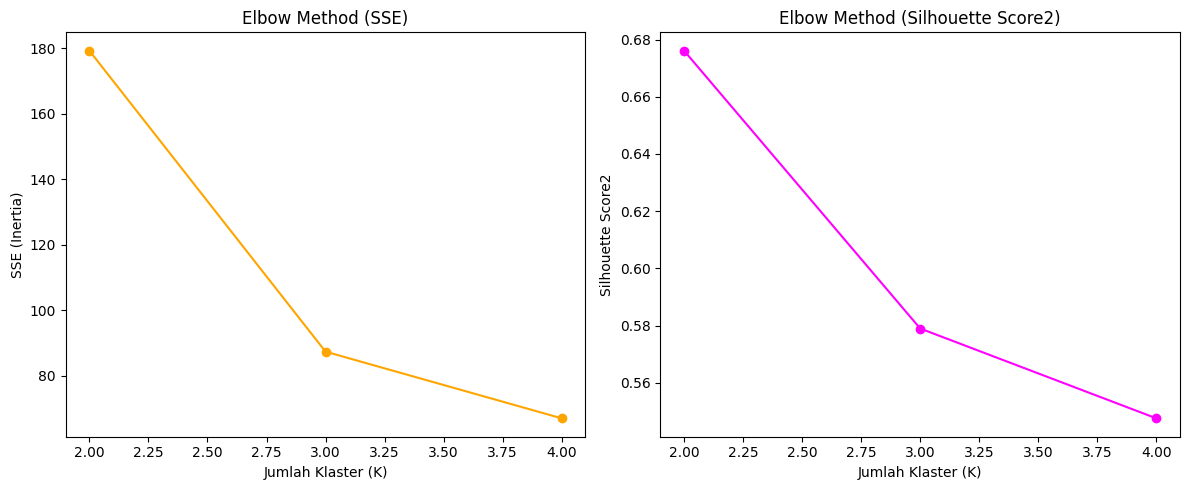

In [162]:
import matplotlib.pyplot as plt

# 4. Visualisasi SSE dan Silhouette Score
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 5), sse_scores2, marker='o', color='orange')
plt.title('Elbow Method (SSE)')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('SSE (Inertia)')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 5), silhouette_scores2, marker='o', color='magenta')
plt.title('Elbow Method (Silhouette Score2)')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score2')

plt.tight_layout()
plt.show()
